# Discretization (Binning)

In [1]:
import pandas as pd
import numpy as np

In [2]:

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('day-29-scikit-learn-pipeline/train.csv',usecols=['Age','Fare','Survived'])
df.head(2)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(714, 3)

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
X= df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [14]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [15]:
clf = DecisionTreeClassifier()

In [16]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [17]:
accuracy_score(y_test,y_pred)

0.6363636363636364

In [18]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.627445226917058

## Discretizer

In [19]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [20]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [21]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.fit_transform(X_test)

In [26]:
trf.named_transformers_['first'].bin_edges_

array([array([ 1.        ,  9.        , 15.9       , 17.        , 20.        ,
              21.        , 24.        , 26.        , 28.        , 30.1       ,
              33.66666667, 36.        , 38.6       , 44.06666667, 52.        ,
              62.        ])                                                   ],
      dtype=object)

In [27]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'face_trf':X_train_trf[:,1]
})

In [28]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                             bins = trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                             bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [29]:
output.sample(5)

,age,age_trf,fare,face_trf,age_labels,fare_labels
750,4.0,0.0,23.0000,8.0,"(1.0, 9.0]","(22.62, 26.353]"
373,22.0,4.0,135.6333,14.0,"(21.0, 24.0]","(79.277, 512.329]"
528,39.0,11.0,7.9250,3.0,"(38.6, 44.067]","(7.773, 7.925]"
400,39.0,11.0,7.9250,3.0,"(38.6, 44.067]","(7.773, 7.925]"
730,29.0,7.0,211.3375,14.0,"(28.0, 30.1]","(79.277, 512.329]"


In [30]:

clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [31]:

accuracy_score(y_test,y_pred2)

0.6503496503496503

In [32]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6260954616588419

In [33]:
# Define the function that take bins and strategy and give inputs score and hisogram plots

def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

C:\Users\Pratyush\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\Pratyush\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


0.6260758998435054


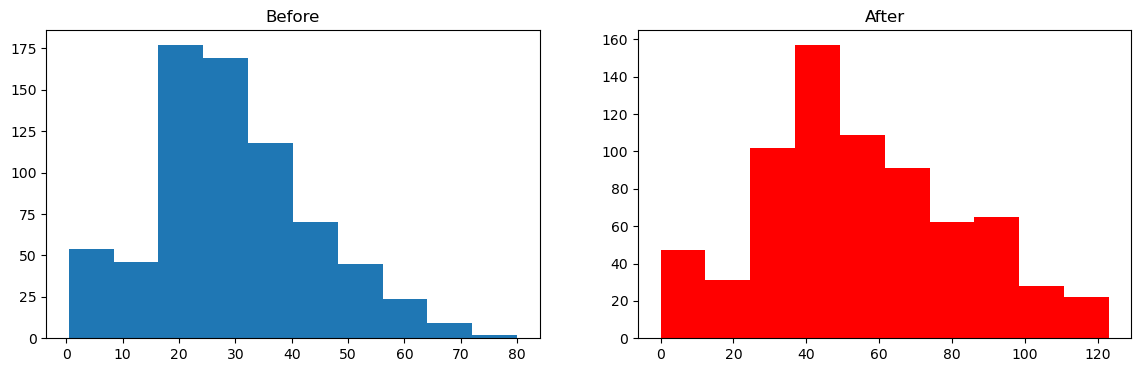

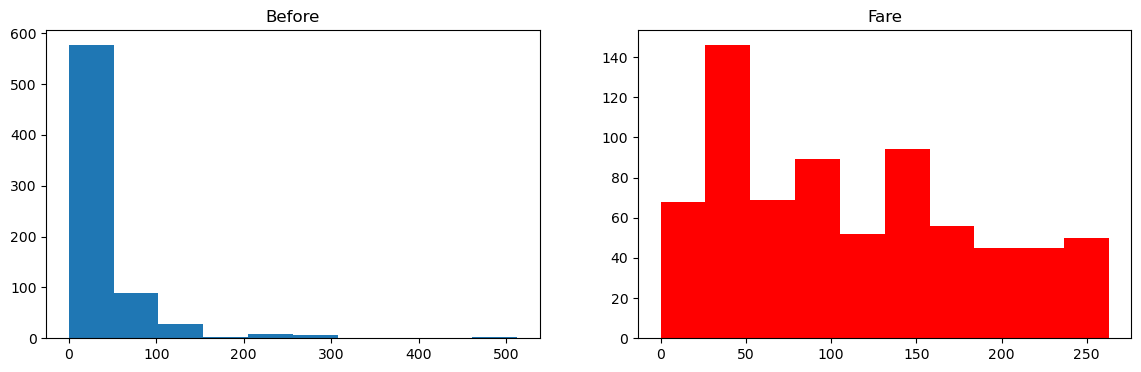

In [36]:
discretize(500,'quantile')

# Binarization

In [46]:
dfe = pd.read_csv('day-29-scikit-learn-pipeline/train.csv',usecols=['Age','Fare','SibSp','Parch','Survived'])
dfe.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [47]:
dfe['family'] = dfe['SibSp'] + dfe['Parch']

In [49]:
dfe.head()

,Survived,Age,SibSp,Parch,Fare,family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0


In [50]:
dfe.drop(columns=['SibSp','Parch'],inplace=True)

In [58]:
dfe.head()

,Survived,Age,Fare,family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [59]:
X = dfe.drop(columns=['Survived'])
y=dfe['Survived']

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [61]:
X_train.head()


,Age,Fare,family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6


In [62]:

# Without binarization

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6759776536312849

In [63]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))


0.6442072409488141

In [64]:
# Applying Binarization

from sklearn.preprocessing import Binarizer

In [65]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder = 'passthrough')

In [66]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [68]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,0.0,45.5,28.5000
1,0.0,23.0,13.0000
2,0.0,32.0,7.9250
3,1.0,26.0,7.8542
4,1.0,6.0,31.2750
...,...,...,...
707,0.0,21.0,7.6500
708,0.0,NaN,31.0000
709,1.0,41.0,14.1083
710,1.0,14.0,120.0000


In [69]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6424581005586593

In [70]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6543196004993758